In [2]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/cd/be/c3185d7a90460e63c84e3f8eac75692174f0a91a889403948bff609fce53/matplotlib-3.7.3-cp38-cp38-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/02/7e/ffaba1bf3719088be3ad6983a5e85e1fc9edccd7b406b98e433436ecef74/contourpy-1.1.1-cp38-cp38-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/68/64/bddfde5fb5c69de4049c5ef4ccfba5dcab90e9a8416ee8e8b733737e373c/fonttools-4.43.1-cp38-cp38-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 1.8 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency informa

In [3]:
import numpy as np
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid

# Symbolic Case

You know the formula explicitly 

$$f(x) = ... $$

In this case there are two options

1. The integral can be solved analytically $\int f(x) dx = \text{Something you can write down}$
2. The integral cannot be solved analytically

We can try sympy at first to see if the integral can be solved analytically



## Part 1: "Solvable" Integrals

**Example**: Find $\int \sin^3(x) e^{-5x} dx$

In [4]:
x = smp.symbols('x', real=True)
f = smp.sin(x)**3 * smp.exp(-5*x)

In [5]:
smp.integrate(f, x)

-40*exp(-5*x)*sin(x)**3/221 - 21*exp(-5*x)*sin(x)**2*cos(x)/221 - 15*exp(-5*x)*sin(x)*cos(x)**2/442 - 3*exp(-5*x)*cos(x)**3/442

**Example**: Find $\int \cos(bx)e^{-ax} dx$

In [6]:
a, b = smp.symbols('a b', real=True, positive=True)
f = smp.cos(b*x)* smp.exp(-a*x)

In [7]:
smp.integrate(f, x).simplify()

(-a*cos(b*x) + b*sin(b*x))*exp(-a*x)/(a**2 + b**2)

**Example**: Find  $\int \frac{(1+\sqrt{x})^{1/3}}{\sqrt{x}} dx$

In [8]:
f = (1+smp.sqrt(x))**smp.Rational(1,3) / smp.sqrt(x)
smp.integrate(f, x).simplify()

3*(sqrt(x) + 1)**(4/3)/2

**Example** (Definite) Find $\int_{0}^{\ln(4)}\frac{e^x}{\sqrt{e^{2x}+9}} dx$

In [9]:
f = smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9)
smp.integrate(f, (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

**Example** (Improper) Find $ \int_{0}^{\infty} \frac{16 \tan^{-1}(x)}{1+x^2} dx $

In [18]:
f = 16*smp.atan(x) / (1+x**2)
smp.integrate(f, (x, 0, smp.oo))

2*pi**2

## Part 2: "Unsolvable" Integrals

**Example**: Find $\int_{1}^{2} e^{-\sin(x)} dx$

Won't run

In [22]:
#f = smp.exp(-smp.sin(x))
#smp.integrate(f, (x, 1, 2)).simplify()

So we use scipy's `quad` function to integrate numerically

In [23]:
f = lambda x: np.exp(-np.sin(x))

In [28]:
f = lambda x: np.exp(-np.sin(x))
quad(f, 1, 2)

(0.3845918142796868, 4.2698268729567035e-15)

**Example**: Find $\int_{0}^{2\pi} \frac{1}{(a-\cos(x))^2 + (b-\sin(x))^2} dx$

In [ ]:
#f = 1/((a-smp.cos(x))**2 + (b-smp.sin(x))**2)
#smp.integrate(f, (x, 0, 2*smp.pi)).simplify()

This won't run as this does not have an analytical solution. We must solve it numerically, and thus we need choose values of $a$ and $b$ each time

In [31]:
f = lambda x: 1/((a-np.cos(x))**2 + (b-np.sin(x))**2)
a, b = 2, 3
quad(f, 0, 2*np.pi)

(0.5235987755982989, 1.9168823883823662e-13)

We can solve this for many different values of $a$ and $b$ quickly as follows:

In [38]:
def f(x, a, b):
    return 1/((a-np.cos(x))**2 + (b-np.sin(x))**2)

In [39]:
a_array = np.arange(2,10,1)
b_array = np.arange(2,10,1)
integrals = [[a, b, quad(f, 0, 2*np.pi, args=(a,b))[0]] for a in a_array for b in b_array]

# Numerical Case

This is the case where one collects actual data and wants to find the integral

In [12]:
from scipy.integrate import odeint


In [13]:
def model(Rp,t,S):
    k1 = 1
    k2 = 1
    Rt = 1
    km1 = 0.05
    km2 = 0.05
    dRpdt = (k1*S*(Rt-Rp)/(km1+Rt-Rp)) - k2*Rp/(km2+Rp)
    return dRpdt

In [14]:
S = 1
Rp0 = [0,0.3,1]
t = np.linspace(0,20,200)
result = odeint(model,Rp0,t,args=(S,))

Text(0, 0.5, 'Rp')

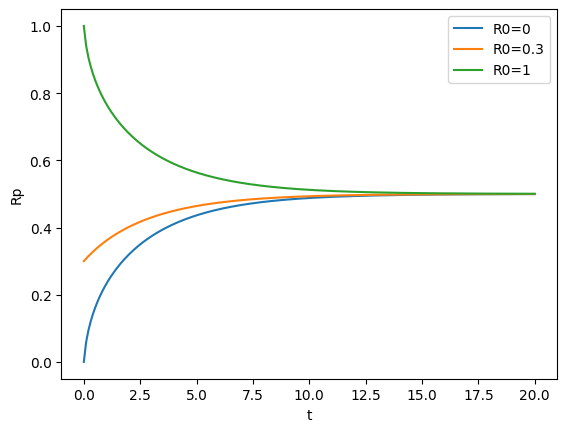

In [15]:
fig,ax = plt.subplots()
ax.plot(t,result[:,0],label='R0=0')
ax.plot(t,result[:,1],label='R0=0.3')
ax.plot(t,result[:,2],label='R0=1')
ax.legend()
ax.set_xlabel('t')
ax.set_ylabel('Rp')